In [46]:
import yfinance as yf

BTC_hist = yf.Ticker("BTC-USD").history(period="1y").loc[:, "Close"]
BTC_hist.index = BTC_hist.index.astype("datetime64[ns]").round("d")
SnP = yf.Ticker("^GSPC").history(start=BTC_hist.index[0], end=BTC_hist.index[-1]).loc[:, ["Close"]]
SnP.index = SnP.index.astype("datetime64[ns]").round("d")

C:\Users\abouzma\AppData\Local\Temp\ipykernel_16232\1678495709.py:4: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  BTC_hist.index = BTC_hist.index.astype("datetime64[ns]").round("d")
C:\Users\abouzma\AppData\Local\Temp\ipykernel_16232\1678495709.py:6: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  SnP.index = SnP.index.astype("datetime64[ns]").round("d")


In [47]:
df = SnP
df.columns = ["S&P500"]
df.loc[:, "BTC"] = BTC_hist
df

,S&P500,BTC
Date,,
2022-04-05,4525.120117,45555.992188
2022-04-06,4481.149902,43206.738281
2022-04-07,4500.209961,43503.847656
2022-04-08,4488.279785,42287.664062
2022-04-11,4412.529785,39521.902344
...,...,...
2023-03-29,4027.810059,28348.441406
2023-03-30,4050.830078,28033.562500
2023-03-31,4109.310059,28478.484375


Let's create the percentage change columns and check if they work as expected:

In [48]:
for col in df.columns:
    df[col+"_g"] = df[col].pct_change()
df

,S&P500,BTC,S&P500_g,BTC_g
Date,,,,
2022-04-05,4525.120117,45555.992188,NaN,NaN
2022-04-06,4481.149902,43206.738281,-0.009717,-0.051568
2022-04-07,4500.209961,43503.847656,0.004253,0.006876
2022-04-08,4488.279785,42287.664062,-0.002651,-0.027956
2022-04-11,4412.529785,39521.902344,-0.016877,-0.065404
...,...,...,...,...
2023-03-29,4027.810059,28348.441406,0.014237,0.039618
2023-03-30,4050.830078,28033.562500,0.005715,-0.011107
2023-03-31,4109.310059,28478.484375,0.014437,0.015871


And use a scatter plot to confirm our suspicion that BTC is correlated to S&P500 (as a proxy for financial assets more generally)

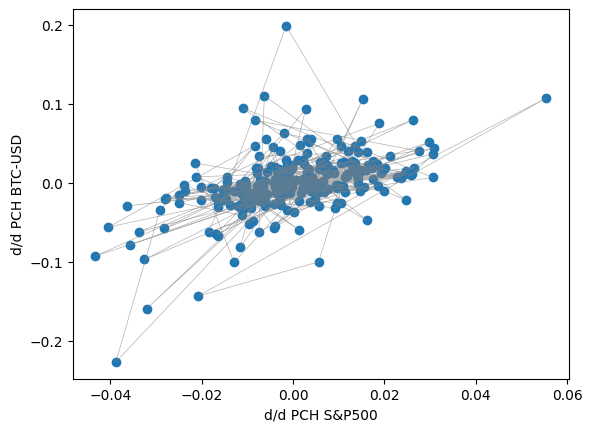

In [49]:
import matplotlib.pyplot as plt
data = df.iloc[:,2], df.iloc[:, 3]
scat = plt.scatter(*data)
line = plt.plot(*data, linewidth=.5, color = "grey", alpha = .6)
plt.xlabel("d/d PCH S&P500")
plt.ylabel("d/d PCH BTC-USD")
plt.show()

The above chart shows that, indeed, over the last year, the day-on-day growth rates of the two series are correlated with each other.
Using numpy, we can easily calculate how much:

In [50]:
import numpy as np
a, b = data
print(np.corrcoef(a.values[1:], b.values[1:]))

[[1.         0.51554889]
 [0.51554889 1.        ]]
